# Assignmnet
We will be working on a very cool problem which is classifying hand signs. In each image the hand is holding certain number of fingers up. The number of fingers held by the hand is the class number. The original dataset is in a format call h5 format. It is an efficient format to store and organize large amounts of data. [Click here to read more about it](https://en.wikipedia.org/wiki/Hierarchical_Data_Format). The following function `load_dataset()` is ready for you to use. It will return four variables in the following order: X_train, Y_train, X_test, Y_test. Hence, your data is already splitted and there is no need for you to split it.

You can download the training datafile here https://drive.google.com/open?id=1vcbjJMj4RuuuqayUu40ScHJdSY4DZOrj

You can download the test datafile here https://drive.google.com/open?id=1rQ1RCIBzw7ho_n6x0vbMzdZ8fAzi1hIQ

Make sure you have both on the same directory as your notebook

In [1]:
# Solve Here
# this is unrelated to the class .. It just helps displaying all outputs in a cell instead of just last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import h5py
import numpy as np
import tensorflow as tf
def load_dataset():
    train_dataset = h5py.File('train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((train_set_y_orig.shape[0]),1)
    test_set_y_orig = test_set_y_orig.reshape((test_set_y_orig.shape[0],1))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
# Downloaded the file 'test.signs.h5' and 'train.signs.h5'
train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes= load_dataset()

Generate 20 random numbers between 0 and the length of the training dataset. Plot 20 images from the dataset using these 20 random numbers as indicies to the training dataset. You will need to plot them on 5 rows and 4 columns. In addition, each image will have a title that says `this image belons to class number X`, replace X by the correct class number from the training labels.

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
# Plot here 
# grenerating the 20 random numbers from 0 to lenght of training dataset: here length of set_X and set_Y both has same len
#np.random.seed(123)
rand=np.random.randint(0,len(train_set_y_orig), 20)

<Figure size 1440x1440 with 0 Axes>

/Users/shreedharsapkota/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0]')

Text(0.5, 1.0, '[2]')

Text(0.5, 1.0, '[4]')

Text(0.5, 1.0, '[0]')

Text(0.5, 1.0, '[1]')

Text(0.5, 1.0, '[1]')

Text(0.5, 1.0, '[1]')

Text(0.5, 1.0, '[5]')

Text(0.5, 1.0, '[5]')

Text(0.5, 1.0, '[3]')

Text(0.5, 1.0, '[4]')

Text(0.5, 1.0, '[1]')

Text(0.5, 1.0, '[3]')

Text(0.5, 1.0, '[0]')

Text(0.5, 1.0, '[1]')

Text(0.5, 1.0, '[3]')

Text(0.5, 1.0, '[3]')

Text(0.5, 1.0, '[5]')

Text(0.5, 1.0, '[4]')

Text(0.5, 1.0, '[2]')

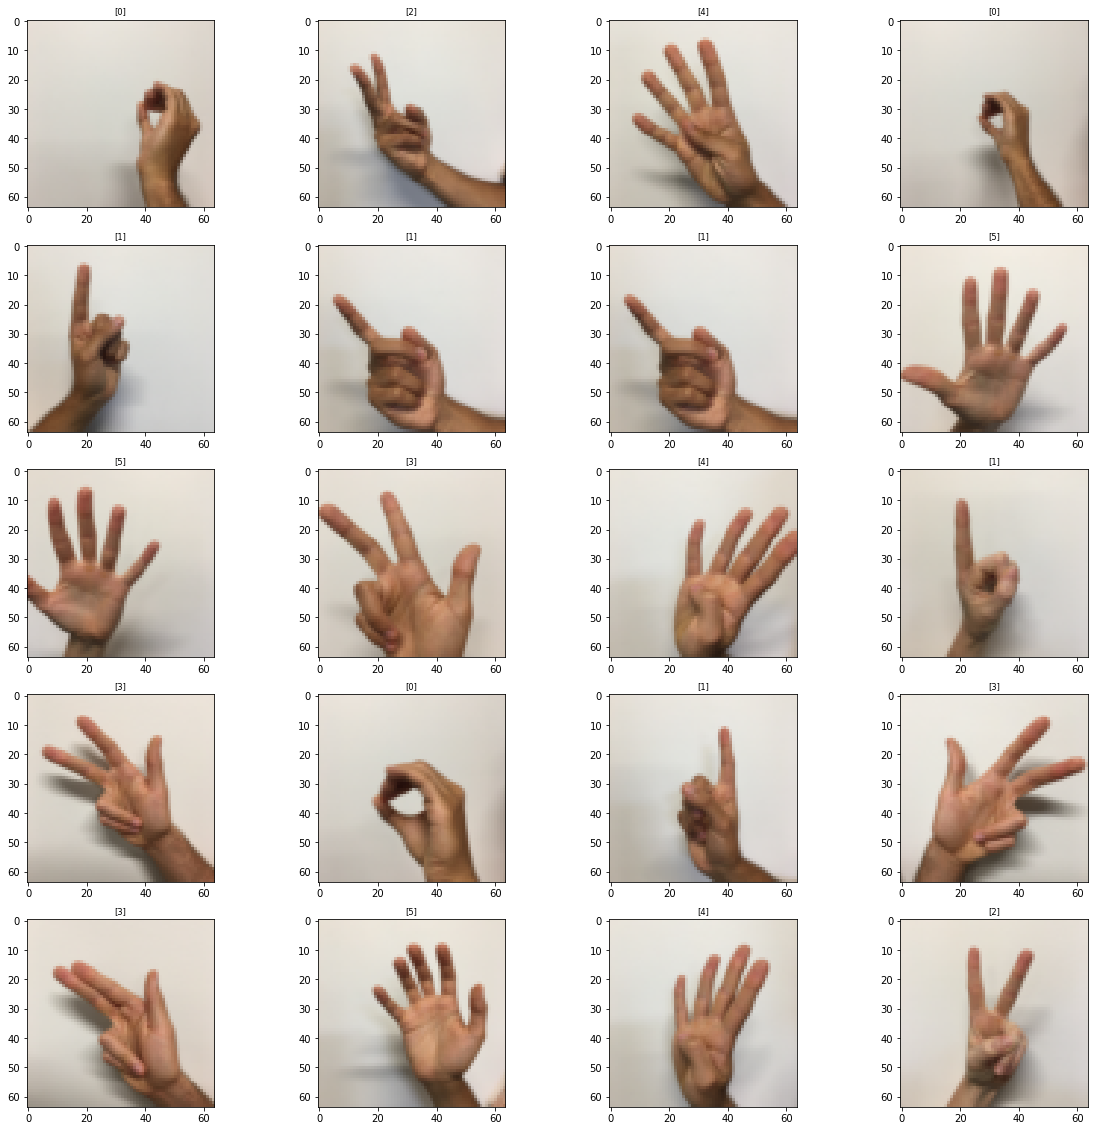

In [5]:
# Solve Here
# We are ploting the 5 row and 4 columns image using for loop
plt.figure(figsize=(20,20))
for i in range(20):
    plt.subplot(5,4,i+1)
    image = train_set_x_orig[rand[i]]   
    plt.imshow(image) # ploting the image using imshow
    plt.title(train_set_y_orig[rand[i]], fontsize='small')

How many classes does the training and test dataset have?

In [6]:
# solve here
import pandas as pd
# Classes for training datasets
pd.DataFrame(train_set_y_orig).iloc[:,0].value_counts()
# Classes for testing datasets
pd.DataFrame(test_set_y_orig).iloc[:,0].value_counts()


5    180
4    180
3    180
2    180
1    180
0    180
Name: 0, dtype: int64

5    20
4    20
3    20
2    20
1    20
0    20
Name: 0, dtype: int64

What is the dimension of the training dataset and test dataset?

In [7]:
# solve here
#dimension of the training dataset and test dataset
print("The Dimension of training set features is:", train_set_x_orig.shape, "and" ,train_set_x_orig.ndim, "Dimension" )
print("The Dimension of training set labels is:", train_set_y_orig.shape, "and" ,train_set_y_orig.ndim, "Dimension" )
print("The Dimension of testin set features is:", test_set_x_orig.shape,  "and" ,test_set_x_orig.ndim, "Dimension" )
print("The Dimension of training set labels is:", test_set_y_orig.shape,  "and" ,test_set_y_orig.ndim, "Dimension" )

The Dimension of training set features is: (1080, 64, 64, 3) and 4 Dimension
The Dimension of training set labels is: (1080, 1) and 2 Dimension
The Dimension of testin set features is: (120, 64, 64, 3) and 4 Dimension
The Dimension of training set labels is: (120, 1) and 2 Dimension


Now we need to normalize the training and test dataset. The pixels are integers. We need them to be float between 0 and 1. You need to divide each of the two matrices by 255. That will produce a normalized image datasets

In [8]:
# Solve Here
# Normalizing the training ans testing dataset
# Converting int to float
train_set_x_orig=train_set_x_orig.astype('Float32')
test_set_x_orig=test_set_x_orig.astype('Float32')
# divide each of the two matrices by 255.
train_set_x_orig=train_set_x_orig/255.0
test_set_x_orig=test_set_x_orig/255.0

/Users/shreedharsapkota/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  after removing the cwd from sys.path.
/Users/shreedharsapkota/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """


In [9]:
# # Normalizing the training ans testing dataset

train_set_x_orig=tf.keras.utils.normalize(train_set_x_orig, axis=1)
test_set_x_orig=tf.keras.utils.normalize(test_set_x_orig, axis=1)

## Build a Baseline Model

As you can see in the dimension (number_images X length X width X RGB), each image has 3 dimensions .. number of pixels in length and width as well as RGB contrast. We needed to flatten both the training and the test dataset so that we can feed to our ML models. To flatten an image, check the following link. https://stackoverflow.com/questions/36967920/numpy-flatten-rgb-image-array

In [10]:
# Flatten both the training and the test dataset
pixels_train = train_set_x_orig.flatten().reshape(1080, -1)
pixels_test = test_set_x_orig.flatten().reshape(120, -1)
# Check the shape of all datasset
pixels_train.shape
train_set_y_orig.shape
pixels_test.shape
test_set_y_orig.shape

(1080, 12288)

(1080, 1)

(120, 12288)

(120, 1)

Now you can apply some old fashion ML. Start with a baseline model such as logistic regression. Fit the model, then evaluate the model by calculating the accuracy and the confusion matrix for the training data and test data. Note, fitting the model may take longer than a minute

In [11]:
# Solve here
# baseline modellogistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(multi_class="auto")

In [12]:
#  Fit the model
logreg.fit(pixels_train, train_set_y_orig)

/Users/shreedharsapkota/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shreedharsapkota/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
# Evaluating the training dataset
predictions_train = logreg.predict(pixels_train)
train_score = logreg.score(pixels_train, train_set_y_orig)
print('Training accuracy is ', train_score)

Training accuracy is  0.9453703703703704


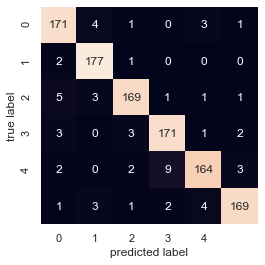

In [14]:
# Creating ths confusion matrix
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(train_set_y_orig, predictions_train)
import seaborn as sns; sns.set()  # for plot styling
sns.heatmap(cm_train, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=range(5),
            yticklabels=range(5))
plt.ylabel('true label')
plt.xlabel('predicted label');

In [15]:
# Evaluating the test dataset
predictions_test = logreg.predict(pixels_test)
# Use score method to get accuracy of model
score_test = logreg.score(pixels_test, test_set_y_orig)
print(score_test)

0.8333333333333334


              precision    recall  f1-score   support

           0       0.87      1.00      0.93        20
           1       0.90      0.95      0.93        20
           2       0.93      0.65      0.76        20
           3       0.75      0.90      0.82        20
           4       0.88      0.70      0.78        20
           5       0.73      0.80      0.76        20

    accuracy                           0.83       120
   macro avg       0.84      0.83      0.83       120
weighted avg       0.84      0.83      0.83       120



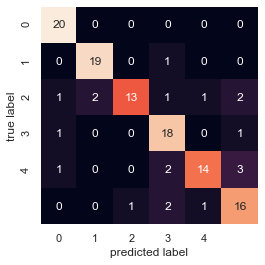

In [16]:
# Creating the classification and confusion matrix 
from sklearn.metrics import confusion_matrix, classification_report
cr = classification_report(test_set_y_orig, predictions_test)
print(cr)
cm = confusion_matrix(test_set_y_orig, predictions_test)
import seaborn as sns; sns.set()  # for plot styling
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=range(5),
            yticklabels=range(5))
plt.ylabel('true label')
plt.xlabel('predicted label');

# Build a DNN 
Use Keras to build a small neural network. Number of hidden layers is less than 5 and each layer should have between 5 and 10 neurons. The loss for a multiclass keras problem is called `SparseCategoricalCrossentropy`. Notice that, we already have a flattening layer in DNN, so you can actually use the normalized image without the flattening step that you have done earlier when you were building logistic regression

In [17]:
# Solve Here
# Using tensorflow keras andNumber of hidden layers is less than 5 and each layer should have between 5 and 10 neurons
from tensorflow.keras import models, layers
model = models.Sequential()
model.add(layers.Flatten(input_shape=(64,64,3)))
model.add(layers.Dense(9, activation = 'relu'))
model.add(layers.Dense(9, activation = 'relu'))
model.add(layers.Dense(7, activation = 'relu'))
model.add(layers.Dense(6, activation = 'softmax'))

In [18]:
#Compiling the model
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [19]:
# fitting the model
model.fit(train_set_x_orig, train_set_y_orig, epochs=10, validation_data=(test_set_x_orig, test_set_y_orig))

Train on 1080 samples, validate on 120 samples
Epoch 1/10
1080/1080 [==============================] - 2s 2ms/sample - loss: 1.8037 - accuracy: 0.1574 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 2/10
1080/1080 [==============================] - 0s 139us/sample - loss: 1.7919 - accuracy: 0.1667 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 3/10
1080/1080 [==============================] - 0s 129us/sample - loss: 1.7919 - accuracy: 0.1667 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 4/10
1080/1080 [==============================] - 0s 129us/sample - loss: 1.7920 - accuracy: 0.1472 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 5/10
1080/1080 [==============================] - 0s 130us/sample - loss: 1.7919 - accuracy: 0.1556 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 6/10
1080/1080 [==============================] - 0s 134us/sample - loss: 1.7919 - accuracy: 0.1667 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 7/10
1080/1080 [==============================] - 0s 131us/sa

In [20]:
#model.evaluate(train_set_x_orig, train_set_y_orig)
#model.evaluate(test_set_x_orig, test_set_y_orig)


### Note: Here we can see that the model that we have build up using neurons less than 10 will not go beyond the accuracy score of 0.16/0.17 as the dataset has a lot of noise and it is impossible for the model to learn anything using the low number of neurons. 


In [21]:
# Calculating classification report and confusion matrix
pred_test = model.predict_classes(test_set_x_orig)
from sklearn.metrics import classification_report, confusion_matrix
cr = classification_report(test_set_y_orig, pred_test)
print(cr)
cm = confusion_matrix(test_set_y_orig, pred_test)
print(cm)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        20
           5       0.17      1.00      0.29        20

    accuracy                           0.17       120
   macro avg       0.03      0.17      0.05       120
weighted avg       0.03      0.17      0.05       120

[[ 0  0  0  0  0 20]
 [ 0  0  0  0  0 20]
 [ 0  0  0  0  0 20]
 [ 0  0  0  0  0 20]
 [ 0  0  0  0  0 20]
 [ 0  0  0  0  0 20]]


/Users/shreedharsapkota/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Learning Rate Optimizing
Did you notice that the it was not or learning was a little slow at the beginning? That is because of the keras learning rate is being high by default. Let's play around with the learning rate to give the DNN more change to learn. Change the compiling line for the model to `model.compile(loss='SparseCategoricalCrossentropy', optimizer = tf.keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])` so that you can decrease the learning rate. Moreover, this is a good chance to read about the different optimizers type. Check this link.
https://medium.com/datadriveninvestor/overview-of-different-optimizers-for-neural-networks-e0ed119440c3

Run your network for at least 300 epochs and use batch_size=100

What is the training and validation accuracy and confusion matrix for both?

In [22]:
# Solve Here
# Creating new learning rate
from tensorflow.keras import models, layers
model = models.Sequential()
model.add(layers.Flatten(input_shape=(64,64,3)))
model.add(layers.Dense(9, activation = 'relu'))
model.add(layers.Dense(9, activation = 'relu'))
model.add(layers.Dense(7, activation = 'relu'))
model.add(layers.Dense(6, activation = 'softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(lr=0.0001), metrics=['accuracy']) 

In [23]:
# Adding new epochs and batch size of 100
history= model.fit(train_set_x_orig, train_set_y_orig, epochs=300, batch_size=100, validation_data=(test_set_x_orig,test_set_y_orig))

Train on 1080 samples, validate on 120 samples
Epoch 1/300
1080/1080 [==============================] - 1s 681us/sample - loss: 1.7930 - accuracy: 0.1685 - val_loss: 1.7921 - val_accuracy: 0.1667
Epoch 2/300
1080/1080 [==============================] - 0s 90us/sample - loss: 1.7921 - accuracy: 0.1759 - val_loss: 1.7919 - val_accuracy: 0.1500
Epoch 3/300
1080/1080 [==============================] - 0s 91us/sample - loss: 1.7915 - accuracy: 0.1824 - val_loss: 1.7913 - val_accuracy: 0.1667
Epoch 4/300
1080/1080 [==============================] - 0s 94us/sample - loss: 1.7910 - accuracy: 0.1750 - val_loss: 1.7907 - val_accuracy: 0.2083
Epoch 5/300
1080/1080 [==============================] - 0s 98us/sample - loss: 1.7901 - accuracy: 0.1870 - val_loss: 1.7904 - val_accuracy: 0.2333
Epoch 6/300
1080/1080 [==============================] - 0s 91us/sample - loss: 1.7899 - accuracy: 0.1944 - val_loss: 1.7900 - val_accuracy: 0.1833
Epoch 7/300
1080/1080 [==============================] - 0s 96us

### Here we can see that model is learning better when we introduce learning rate and increase the epoch to 300 and batch size as 100. We can see accuracy is imporving than previous. We can see val_accuracy as 47.50%

In [24]:
#Accuracy of the model
#scores = model.evaluate(train_set_x_orig, train_set_y_orig)
#print(model.metrics_names[1], scores[1]*100)

In [25]:
pred_test = model.predict_classes(test_set_x_orig)
from sklearn.metrics import classification_report, confusion_matrix
cr = classification_report(test_set_y_orig, pred_test)
print(cr)
cm = confusion_matrix(test_set_y_orig, pred_test)
print(cm)

              precision    recall  f1-score   support

           0       0.62      0.75      0.68        20
           1       0.48      0.80      0.60        20
           2       0.41      0.35      0.38        20
           3       0.58      0.35      0.44        20
           4       0.27      0.40      0.32        20
           5       0.50      0.10      0.17        20

    accuracy                           0.46       120
   macro avg       0.48      0.46      0.43       120
weighted avg       0.48      0.46      0.43       120

[[15  1  2  0  2  0]
 [ 0 16  0  2  2  0]
 [ 2  7  7  0  3  1]
 [ 1  5  0  7  7  0]
 [ 2  4  3  2  8  1]
 [ 4  0  5  1  8  2]]


Given the learning rate used in the previous part, Build a new model and increase the number of layers and neurons .. maybe 7 or 8 layers with number of neurons between 200 and 1000. Do you see a difference in the accuracy?


What is the training and validation accuracy and confusion matrix for both?

**note: it may take some time to run**

In [26]:
# Solve Here
modelx = models.Sequential()
modelx.add(layers.Flatten(input_shape=(64,64,3)))
modelx.add(layers.Dense(900, activation = 'relu'))
modelx.add(layers.Dense(900, activation = 'relu'))
modelx.add(layers.Dense(700, activation = 'relu'))
modelx.add(layers.Dense(500, activation = 'relu'))
modelx.add(layers.Dense(400, activation = 'relu'))
modelx.add(layers.Dense(400, activation = 'relu'))
modelx.add(layers.Dense(200, activation = 'relu'))
modelx.add(layers.Dense(6, activation = 'softmax'))
modelx.compile(loss='sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(lr=0.0001), metrics=['accuracy']) 

In [27]:
# Fit the model
history= modelx.fit(train_set_x_orig, train_set_y_orig, epochs=300, batch_size=100, validation_data=(test_set_x_orig,test_set_y_orig))

Train on 1080 samples, validate on 120 samples
Epoch 1/300
1080/1080 [==============================] - 2s 2ms/sample - loss: 1.7925 - accuracy: 0.1630 - val_loss: 1.7870 - val_accuracy: 0.1667
Epoch 2/300
1080/1080 [==============================] - 2s 2ms/sample - loss: 1.7863 - accuracy: 0.2102 - val_loss: 1.7744 - val_accuracy: 0.2667
Epoch 3/300
1080/1080 [==============================] - 2s 2ms/sample - loss: 1.7710 - accuracy: 0.2639 - val_loss: 1.7601 - val_accuracy: 0.2917
Epoch 4/300
1080/1080 [==============================] - 2s 2ms/sample - loss: 1.7453 - accuracy: 0.2852 - val_loss: 1.7104 - val_accuracy: 0.3583
Epoch 5/300
1080/1080 [==============================] - 2s 2ms/sample - loss: 1.6717 - accuracy: 0.3435 - val_loss: 1.6144 - val_accuracy: 0.3917
Epoch 6/300
1080/1080 [==============================] - 2s 2ms/sample - loss: 1.6088 - accuracy: 0.3491 - val_loss: 1.6379 - val_accuracy: 0.2167
Epoch 7/300
1080/1080 [==============================] - 2s 2ms/sample 

In [28]:
#Accuracy of the model
#scores = modelx.evaluate(train_set_x_orig, train_set_y_orig)
#print(modelx.metrics_names[1], scores[1]*100)

In [29]:
pred_test = modelx.predict_classes(test_set_x_orig)
from sklearn.metrics import classification_report, confusion_matrix
cr = classification_report(test_set_y_orig, pred_test)
print(cr)
cm = confusion_matrix(test_set_y_orig, pred_test)
print(cm)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       0.90      0.95      0.93        20
           2       1.00      0.85      0.92        20
           3       0.71      0.75      0.73        20
           4       0.74      0.70      0.72        20
           5       0.90      0.90      0.90        20

    accuracy                           0.86       120
   macro avg       0.86      0.86      0.86       120
weighted avg       0.86      0.86      0.86       120

[[20  0  0  0  0  0]
 [ 0 19  0  1  0  0]
 [ 0  1 17  2  0  0]
 [ 1  0  0 15  4  0]
 [ 1  1  0  2 14  2]
 [ 0  0  0  1  1 18]]


### Note: If there was enough time I would work more on validation point and tune with it

### Here we can see that when we increase the to number of layers to 7  and number of neurons between 200 to 1000 we can see that the model is has better val_accuracy which is 86.67%

**Bonus**

See if you can change some of the parameters so that some of the epochs can reach a validation accuracy of at least 92%

In [ ]:

from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.layers import Dense, Dropout, Flatten
model6 = models.Sequential()
model6.add(Flatten(input_shape =(64,64,3)))
model6.add(layers.Dense(1000, activation='relu',  kernel_regularizer=regularizers.l2(0.001)))
model6.add(layers.Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model6.add(layers.Dense(500, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model6.add(layers.Dense(800, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model6.add(layers.Dense(500, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model6.add(layers.Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model6.add(layers.Dense(500, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model6.add(layers.Dense(6, activation='softmax', kernel_regularizer=regularizers.l2(0.001)))

# compile model - changed learning rate to be lower since with higher learning rate
# there was a lot of oscillation in the loss so previous model was having trouble converging
model6.compile(loss='sparse_categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(lr=0.00005), metrics=['accuracy'])
# fit model and store accuracy/loss of training and validation to be used later to evaluate model
history=model6.fit(train_set_x_orig, train_set_y_orig, epochs=350, batch_size=100, validation_data=(test_set_x_orig,test_set_y_orig))

Train on 1080 samples, validate on 120 samples
Epoch 1/350
1080/1080 [==============================] - 6s 6ms/sample - loss: 7.8040 - accuracy: 0.1463 - val_loss: 7.6972 - val_accuracy: 0.2083
Epoch 2/350
1080/1080 [==============================] - 3s 3ms/sample - loss: 7.6124 - accuracy: 0.2296 - val_loss: 7.5054 - val_accuracy: 0.2417
Epoch 3/350
1080/1080 [==============================] - 4s 4ms/sample - loss: 7.4228 - accuracy: 0.2398 - val_loss: 7.3214 - val_accuracy: 0.1750
Epoch 4/350
1080/1080 [==============================] - 3s 3ms/sample - loss: 7.2339 - accuracy: 0.3130 - val_loss: 7.1247 - val_accuracy: 0.3250
Epoch 5/350
1080/1080 [==============================] - 4s 4ms/sample - loss: 7.0368 - accuracy: 0.3185 - val_loss: 6.9255 - val_accuracy: 0.3000
Epoch 6/350
1080/1080 [==============================] - 4s 3ms/sample - loss: 6.8351 - accuracy: 0.3250 - val_loss: 6.7125 - val_accuracy: 0.3250
Epoch 7/350
1080/1080 [==============================] - 4s 3ms/sample 

### Here we can see that after regularization we can see bring regularization there is improvement in it but didnt reach 92%. May be I have increase the epoch.